# Lesson 9


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42, cluster_std=0.60)

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['True_Label'] = y_true

print("Generated Data:")
print(df.head())
print(f"\nData shape: {df.shape}")
print(f"Number of unique clusters: {df['True_Label'].nunique()}")


Generated Data:
   Feature_1  Feature_2  True_Label
0  -9.113944   6.813616           3
1  -9.354576   7.092790           3
2  -2.015671   8.281780           0
3  -7.010236  -6.220843           2
4 -10.061202   6.718671           3

Data shape: (300, 3)
Number of unique clusters: 4


In [3]:
np.random.seed(42)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df['Predicted_Label'] = labels

print("K-Means Training Complete!")
print(f"Number of clusters found: {len(centroids)}")
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_:.2f}")


K-Means Training Complete!
Number of clusters found: 4
Inertia (within-cluster sum of squares): 203.89


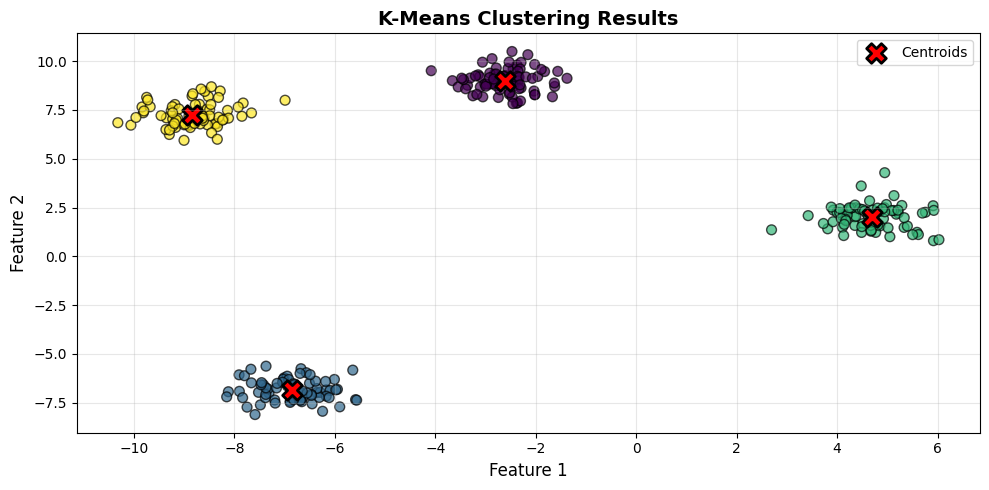


Cluster Centroids:
  Cluster 0: (-2.61, 8.99)
  Cluster 1: (-6.85, -6.85)
  Cluster 2: (4.69, 2.01)
  Cluster 3: (-8.83, 7.24)


In [4]:

plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, 
            label='Centroids', edgecolors='black', linewidths=2)

plt.title('K-Means Clustering Results', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")
